In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df = pd.read_csv(r'Play Store Data.csv')
df1 = pd.read_csv(r'User Reviews.csv')

In [71]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [73]:
df1.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
15169,"Black Wallpaper, AMOLED, Dark Background: Darkify",NaN,NaN,NaN,NaN
29718,Couple - Relationship App,NaN,NaN,NaN,NaN
61268,"HelloTalk — Chat, Speak & Learn Foreign Languages",Why demand permission make phone calls? That a...,Positive,0.375000,1.000000
21007,Calendar+ Schedule Planner App,NaN,NaN,NaN,NaN
23398,Candy Crush Saga,"If get free lives refill, continue accumulate ...",Positive,0.374411,0.556987


## Data Cleaning of Playstore dataset


In [74]:
#Size of the dataset
df.shape

(10841, 13)

In [75]:
print("number of rows in the dataset", df.shape[0])
print("number of columns in the dataset", df.shape[1])

number of rows in the dataset 10841
number of columns in the dataset 13


In [76]:
#columns in the dataset 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [77]:
#Information of the columns in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [78]:
#Statistical information of numeric column in the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [79]:
#Null values in the dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [80]:
df = df.dropna(subset=['Content Rating', 'Type', 'Current Ver', 'Android Ver'])

In [81]:
#filling nan values using knn imputer
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)


df['Rating_KNN_Imputed'] = imputer.fit_transform(df[['Rating']])





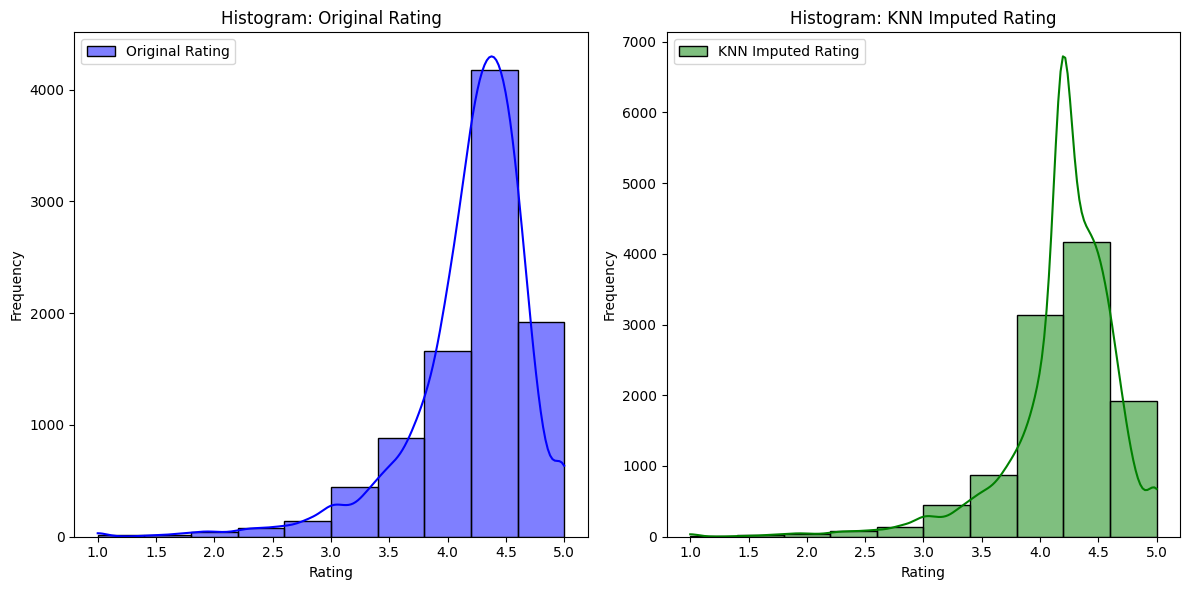

In [82]:
# Plot Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], kde=True, bins=10, color='blue', label='Original Rating')
plt.title('Histogram: Original Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['Rating_KNN_Imputed'], kde=True, bins=10, color='green', label='KNN Imputed Rating')
plt.title('Histogram: KNN Imputed Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



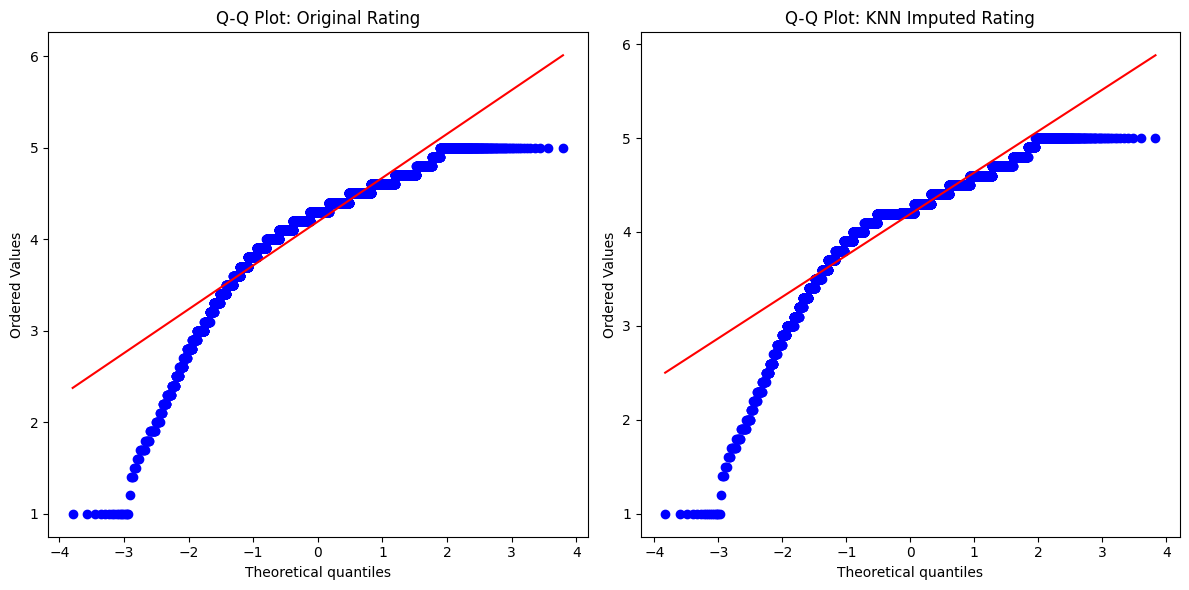

In [83]:
import scipy.stats as stats

# Plot Q-Q Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df['Rating'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot: Original Rating')

plt.subplot(1, 2, 2)
stats.probplot(df['Rating_KNN_Imputed'], dist="norm", plot=plt)
plt.title('Q-Q Plot: KNN Imputed Rating')

plt.tight_layout()
plt.show()


- WE will use knn imputer to impute missing value as it doesnot changes the distribution

In [84]:
#filling nan values using knn imputer
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)


df['Rating'] = imputer.fit_transform(df[['Rating']])






In [86]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Rating_KNN_Imputed    0
dtype: int64

In [109]:
df.to_csv('cleaned_playstore_dataset.csv', index=False)


## Data Cleaning of User Reviews Dataset

In [87]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [90]:
print("number of rows in the dataset",df1.shape[0])
print("number of columns in the dataset",df1.shape[1])

number of rows in the dataset 64295
number of columns in the dataset 5


In [91]:
df1.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [95]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [107]:
# Fill missing values
df1['Translated_Review'].fillna('No review available', inplace=True)
df1['Sentiment'].fillna(df1['Sentiment'].mode()[0], inplace=True)
df1['Sentiment_Polarity'].fillna(df1['Sentiment_Polarity'].mean(), inplace=True)
df1['Sentiment_Subjectivity'].fillna(df1['Sentiment_Subjectivity'].mean(), inplace=True)


C:\Users\bhavi\AppData\Local\Temp\ipykernel_13292\782716120.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Sentiment_Polarity'].fillna(df1['Sentiment_Polarity'].mean(), inplace=True)
C:\Users\bhavi\AppData\Local\Temp\ipykernel_13292\782716120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [108]:
df1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [110]:
df1.to_csv('cleaned_user_dataset.csv', index=False)


## Insights from the data present

In [136]:
# Count of paid apps
paid_apps_count = paid_apps.shape[0]
print(f"Number of paid apps: {paid_apps_count}")

# Count of free apps
free_apps_count = free_apps.shape[0]
print(f"Number of free apps: {free_apps_count}")


Number of paid apps: 797
Number of free apps: 10032


In [127]:
# how sentiment correlates with app ratings.
sentiment_by_app = df1.groupby('App')['Sentiment'].value_counts().unstack(fill_value=0)
print(sentiment_by_app)

Sentiment                                       Negative  Neutral  Positive
App                                                                        
10 Best Foods for You                                 10       22       168
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                       1        8        31
11st                                                   7       10        23
1800 Contacts - Lens Store                             6       10        64
1LINE – One Line with One Touch                        8        3        29
...                                                  ...      ...       ...
Hotspot Shield Free VPN Proxy & Wi-Fi Security         3       14        23
Hotstar                                               14        4        22
Hotwire Hotel & Car Rental App                         6       11        23
Housing-Real Estate & Property                        10        3        27
Houzz Interior Design Ideas                            0        0        59

[1074 rows 

In [128]:
# Group sentiment data by app to understand which apps have the highest number of positive or negative reviews.
sentiment_rating_correlation = df1[['Sentiment', 'Sentiment_Polarity']].groupby('Sentiment').mean()
print(sentiment_rating_correlation)


           Sentiment_Polarity
Sentiment                    
Negative            -0.256173
Neutral              0.000000
Positive             0.271916


In [131]:
# Most Popular Categories
category_counts = df['Category'].value_counts()

top_10_categories = category_counts.head(10)

print("Top 10 categories according to count",top_10_categories)

Top 10 categories according to count Category
FAMILY             1968
GAME               1144
TOOLS               841
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     390
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64


In [132]:
# Investigate how ratings vary across different app categories

category_rating = df.groupby('Category')['Rating'].mean()
print("Category-wise Rating Distribution", category_rating)

Category-wise Rating Distribution Category
ART_AND_DESIGN         4.368367
AUTO_AND_VEHICLES      4.190612
BEAUTY                 4.260570
BOOKS_AND_REFERENCE    4.311198
BUSINESS               4.145475
COMICS                 4.156395
COMMUNICATION          4.163613
DATING                 4.007614
EDUCATION              4.387768
ENTERTAINMENT          4.126174
EVENTS                 4.363202
FAMILY                 4.192321
FINANCE                4.138932
FOOD_AND_DRINK         4.170497
GAME                   4.282444
HEALTH_AND_FITNESS     4.266102
HOUSE_AND_HOME         4.196614
LIBRARIES_AND_DEMO     4.182580
LIFESTYLE              4.112160
MAPS_AND_NAVIGATION    4.064919
MEDICAL                4.189801
NEWS_AND_MAGAZINES     4.142727
PARENTING              4.281973
PERSONALIZATION        4.306573
PHOTOGRAPHY            4.192099
PRODUCTIVITY           4.208029
SHOPPING               4.253925
SOCIAL                 4.247817
SPORTS                 4.218150
TOOLS                  4.0657